In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [2]:
# Loading the Dataset
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

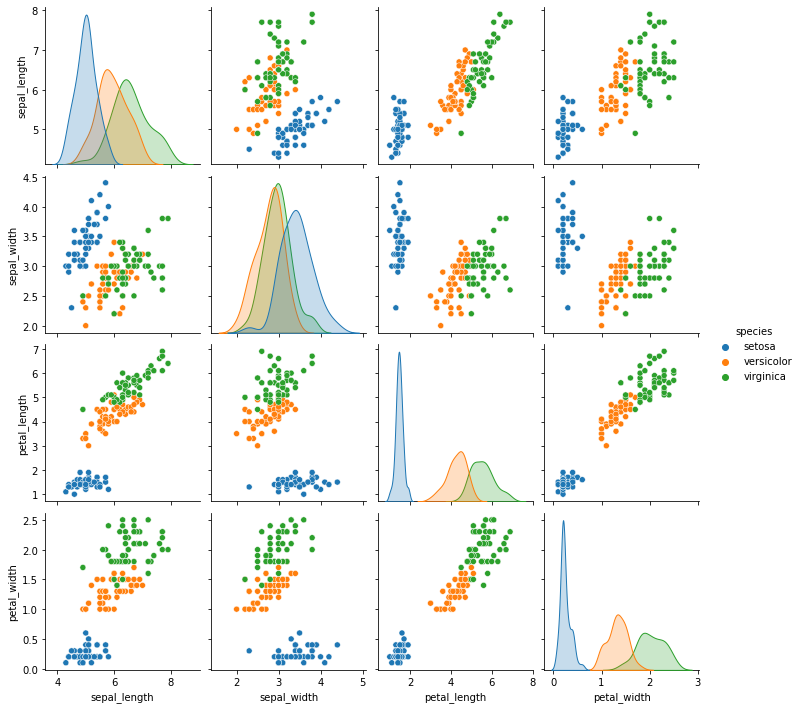

In [6]:
sns.pairplot(data=df, hue='species')

<AxesSubplot:>

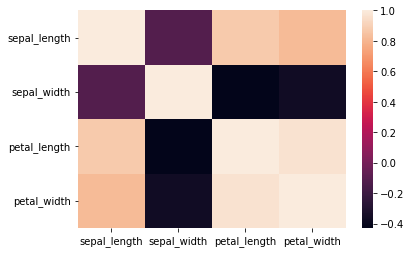

In [7]:
sns.heatmap(df.corr())

In [8]:
# Separating the features and labels
y = df["species"]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [9]:
x = df.copy()
x = x.drop('species', axis=1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
# Encoding the categorical data (labels)
le = LabelEncoder()
y = le.fit_transform(target)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
y = target

In [12]:
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)
print("Training Split:\n", x_train)
print("Testing Split:\n", x_test)

Training Split:
      sepal_length  sepal_width  petal_length  petal_width
54            6.5          2.8           4.6          1.5
113           5.7          2.5           5.0          2.0
135           7.7          3.0           6.1          2.3
4             5.0          3.6           1.4          0.2
115           6.4          3.2           5.3          2.3
..            ...          ...           ...          ...
118           7.7          2.6           6.9          2.3
61            5.9          3.0           4.2          1.5
143           6.8          3.2           5.9          2.3
62            6.0          2.2           4.0          1.0
132           6.4          2.8           5.6          2.2

[120 rows x 4 columns]
Testing Split:
      sepal_length  sepal_width  petal_length  petal_width
28            5.2          3.4           1.4          0.2
72            6.3          2.5           4.9          1.5
70            5.9          3.2           4.8          1.8
85            6

In [13]:
# Implementing Decision Tree Learning
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
y_prediction = dtree.predict(x_test)
print("Classification report:\n", classification_report(y_test, y_prediction))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.92      0.92      0.92        13
           2       0.88      0.88      0.88         8

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



Text(0.5, 1.0, 'Accuracy score: 0.9333333333333333')

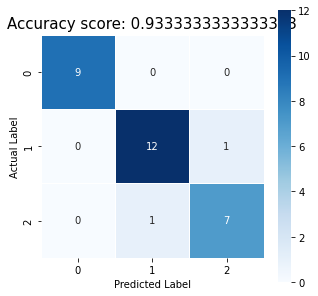

In [15]:
# Drawing the confusion Matrix
cm = confusion_matrix(y_test, y_prediction)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidth=0.5, annot=True, square=True, cmap='Blues')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
all_sample_title = 'Accuracy score: {0}'.format(dtree.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

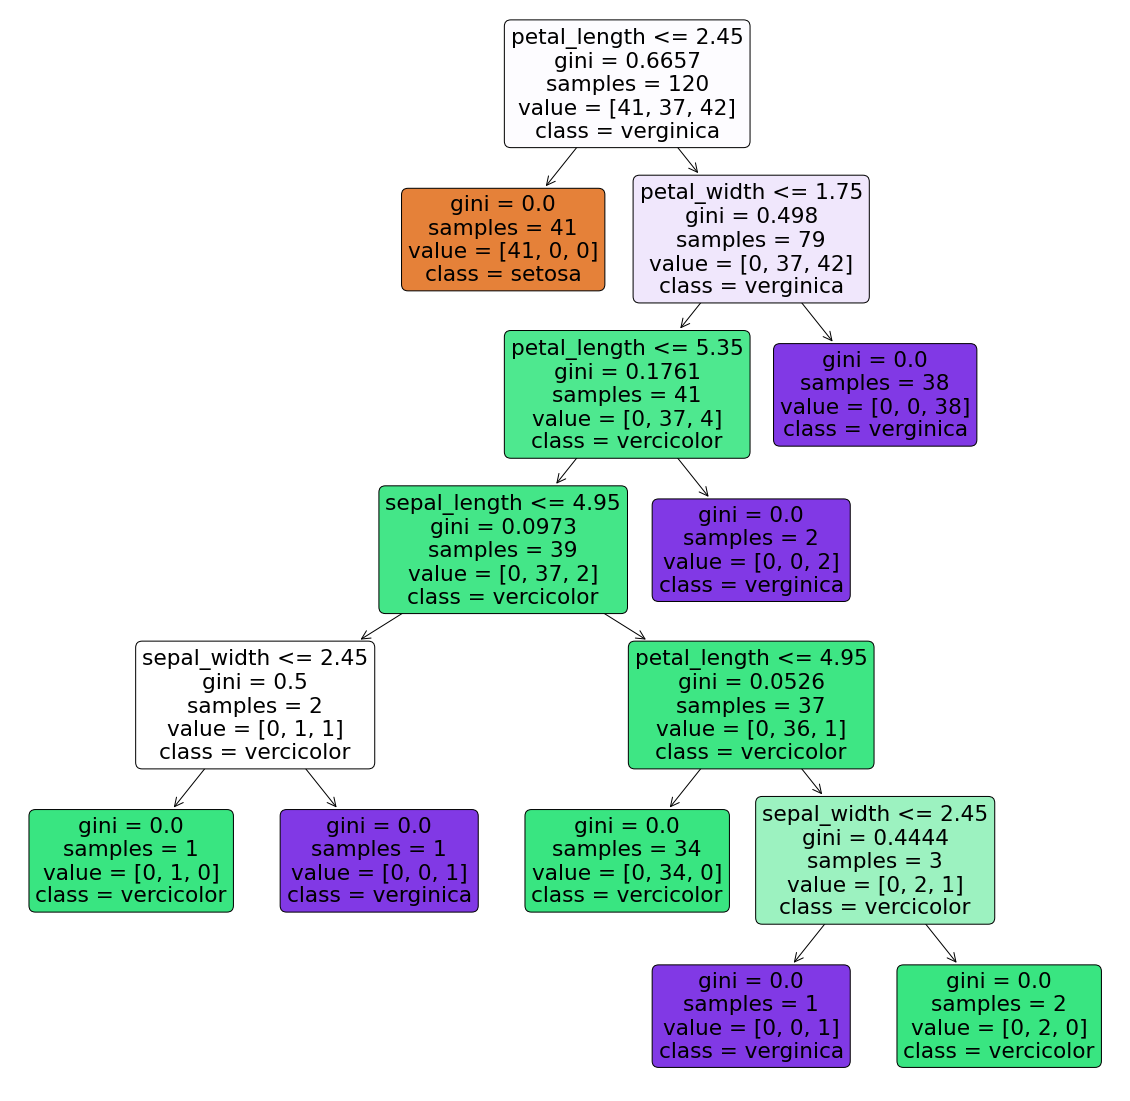

In [16]:
# Visualizing the decision Tree
plt.figure(figsize=(20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names=x.columns, class_names=['setosa', 'vercicolor', 'verginica'], filled=True, precision=4, rounded=True)